In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Puesta en marcha de los datos de entrenamiento

In [3]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


## Creación del modelo

In [9]:
L0 = tf.keras.layers.Dense(units=1, input_shape=[1])

input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

In [10]:
L0

<Dense name=dense_2, built=False>

In [11]:
model = tf.keras.Sequential([L0])

## Compila el modelo

In [12]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

## Entrena el modelo

In [14]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=True)
print("Finished training the model")

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.7943
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.6773
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.5617
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.4474
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.3346
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.2231
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.1130
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.0043
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.8968
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.7907
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.6859
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.5824
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.4801
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.3791
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.2794
Epoch 16/500
1/1 ━━

This cycle of calculate, compare, adjust is controlled by the fit method. 
* The **first** argument is the inputs, the **second** argument is the desired outputs. 
* The **epochs** argument specifies how many times this cycle should be run, and the **verbose** argument controls how much output the method produces.

## Dibuja las estadísticas de entrenamiento

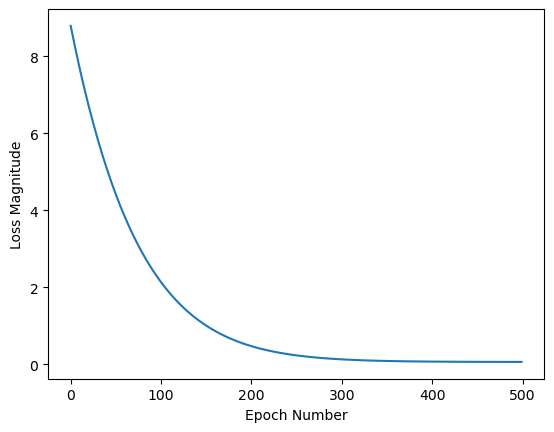

In [15]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Usar el modelo para predecir

In [16]:
print(model.predict(np.array([100])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[211.74275]]


### The correct answer is  100×1.8+32=212 , so our model is doing really well.

## Los pesos de las capas

In [17]:
print("These are the layer variables: {}".format(L0.get_weights()))

These are the layer variables: [array([[1.7982279]], dtype=float32), array([31.919962], dtype=float32)]


## Un experimento

In [18]:
L0 = tf.keras.layers.Dense(units=4, input_shape=[1]) # 4 neuronas
L1 = tf.keras.layers.Dense(units=4) # 4 neuronas
L2 = tf.keras.layers.Dense(units=1) # 1 neurona

model = tf.keras.Sequential([L0, L1, L2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict(np.array([100.0])))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict(np.array([100.0]))))
print("These are the L0 variables: {}".format(L0.get_weights()))
print("These are the L1 variables: {}".format(L1.get_weights()))
print("These are the L2 variables: {}".format(L2.get_weights()))

C:\Users\ftorr\anaconda3\envs\NuevoAmbiente\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished training the model
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[211.74744]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the L0 variables: [array([[ 0.16500303, -0.35202527, -0.51697624, -0.127266  ]],
      dtype=float32), array([-2.4404383, -3.1300297, -2.9101572,  1.971749 ], dtype=float32)]
These are the L1 variables: [array([[-0.14542012, -0.13381548, -0.4426567 ,  0.9226578 ],
       [-0.5367667 ,  0.97023267, -1.3045725 , -0.14615904],
       [-1.0903064 , -0.08266124, -1.3623244 ,  0.7857835 ],
       [-0.04596457, -0.35315615,  0.23188561, -0.96974176]],
      dtype=float32), array([ 3.2290049, -2.239249 ,  3.2294025, -3.2365634], dtype=float32)]
These are the L2 variables: [array([[ 0.72621816],
       [-0.2701724 ],
       [ 1.0577273 ],
       [-0.8566329 ]], dtype=float32), array([2.9699275], dtype=float32)]


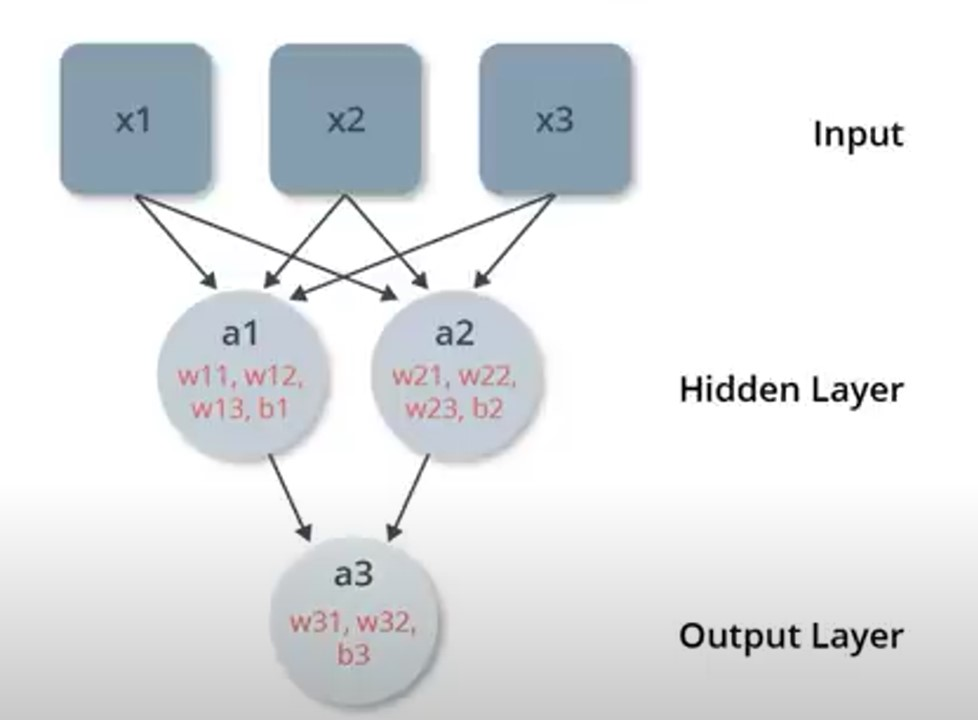

In [19]:
from IPython.display import Image
Image(filename='../python-ml-course/notebooks/resources/RedNeuronal.jpg')

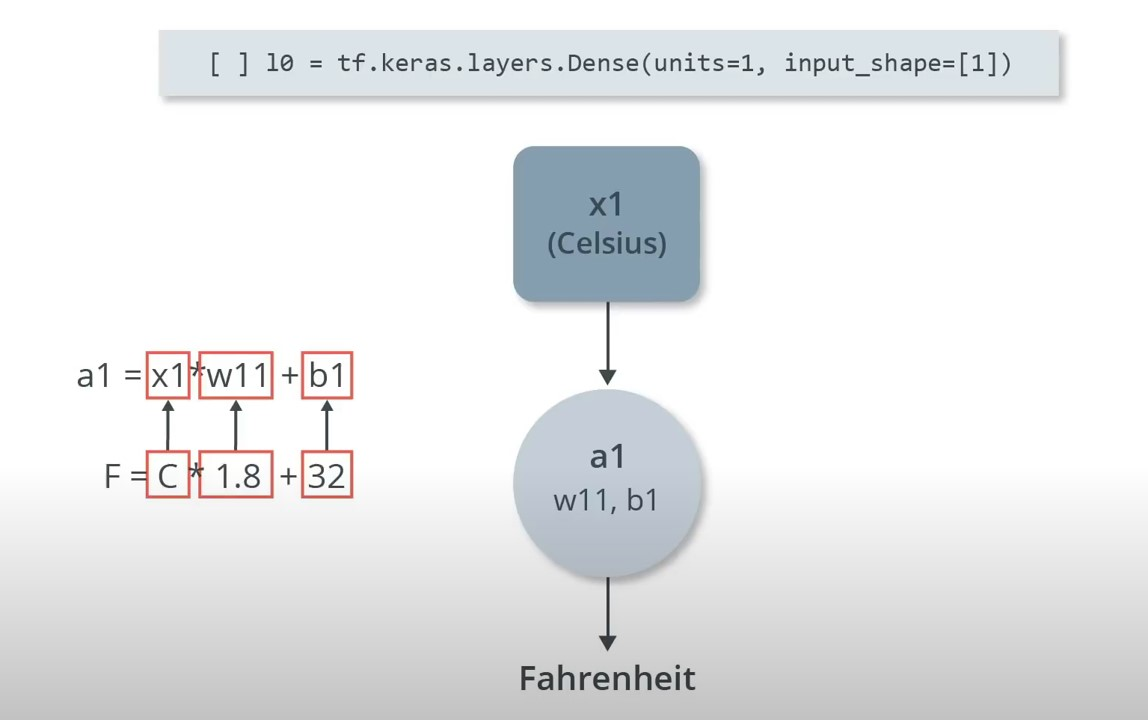

In [20]:
Image(filename='../python-ml-course/notebooks/resources/RedNeuronal2.jpg')

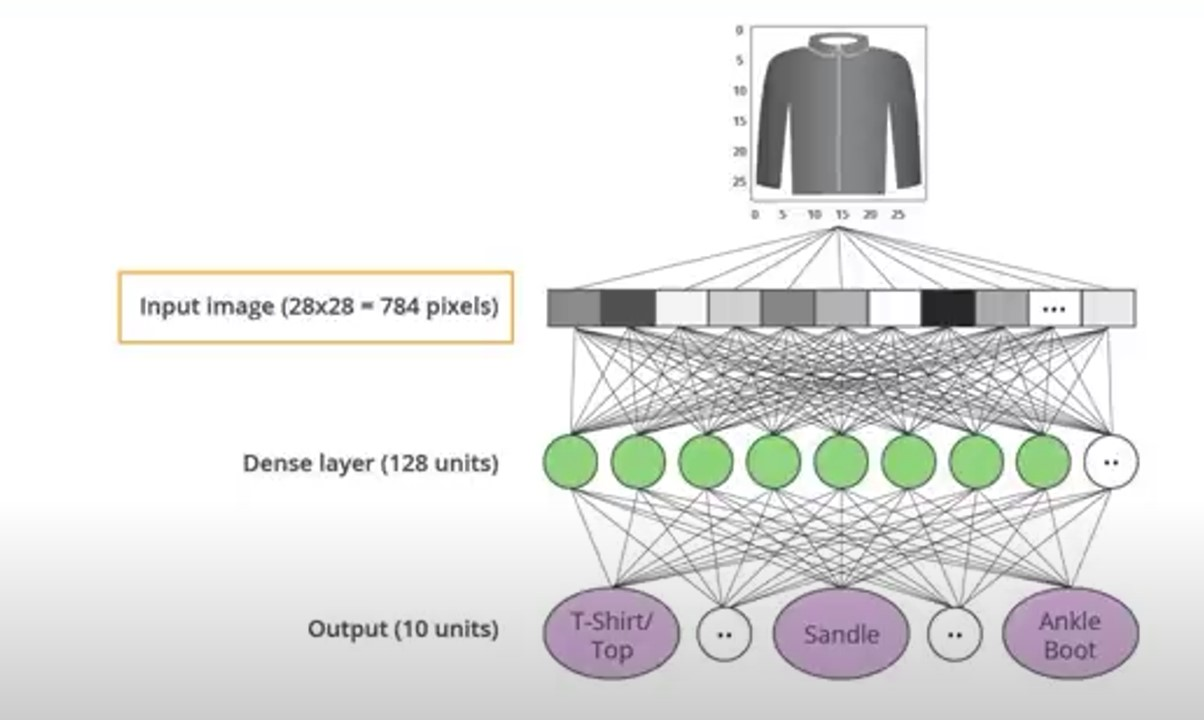

In [21]:
Image(filename='../python-ml-course/notebooks/resources/RedNeuronal3.jpg')

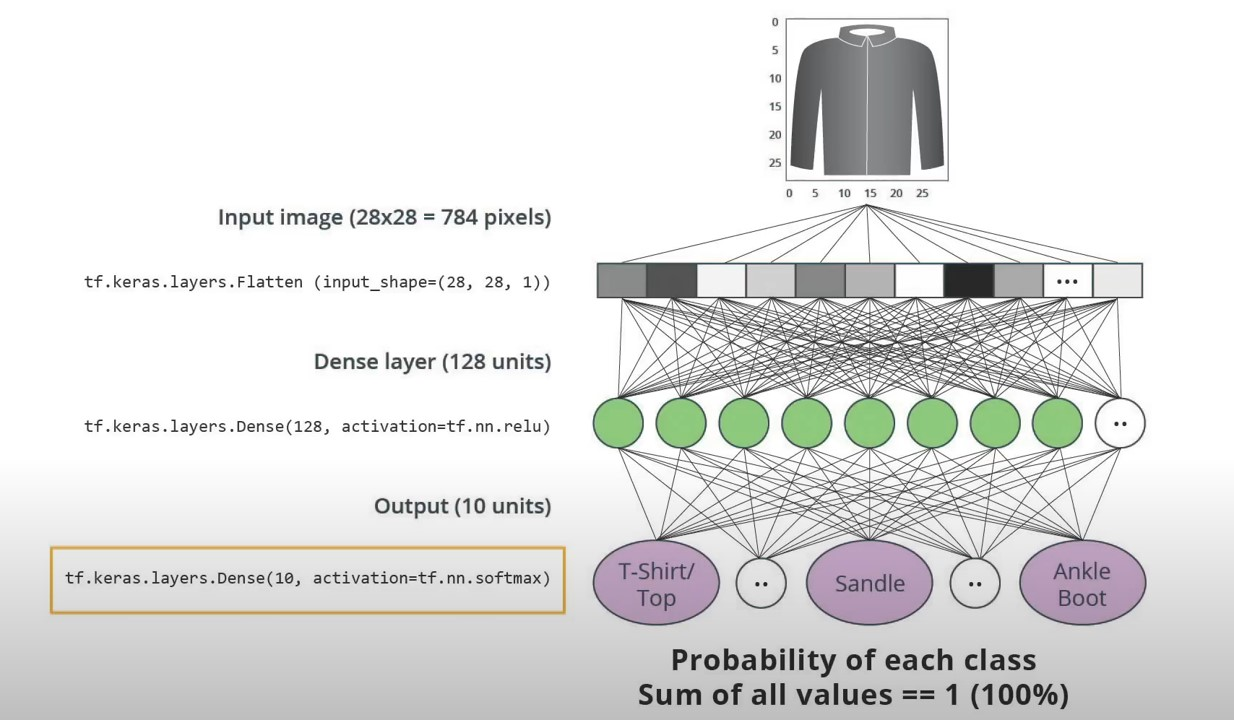

In [22]:
Image(filename='../python-ml-course/notebooks/resources/RedNeuronal4.jpg')

## Clasificación de imágenes

In [23]:
!pip install -U tensorflow_datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 5.1/5.1 MB 28.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ------------- -------------------------- 8.4/25.2 MB 37.1 MB/s eta 0:00:01
   --------------------------- ------------ 17.6/25.2 MB 41.0 MB/s eta 0:00:01
   ---------------------------------------  24.9/25.2 MB 41.5 MB/s eta 0:00:01
   ---------------------------------------- 25.2/25.2 MB 38.8 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21545 sha256=ca1244ca46505827267e97ad458f86809d493e6c25943d9c77f96761445b4e01
  Stored in directory: c:\users\ftorr\appdata\local\pip\cache\wheels\90\74\b1\9b54c896b8d9409e9268329d4d45ede8a8040abe91c8879932
Successfully built promise


In [99]:
import tensorflow as tf

In [100]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [101]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Importar la base de vestidos MNIST

In [102]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [103]:
dataset

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [104]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [105]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Explorando la data

In [106]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


## Preprocesando

In [107]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

## Explorando los datos procesados

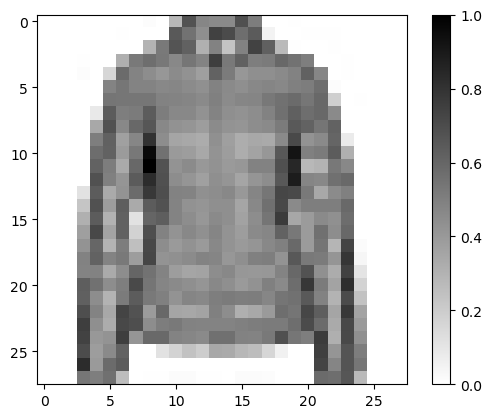

In [108]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

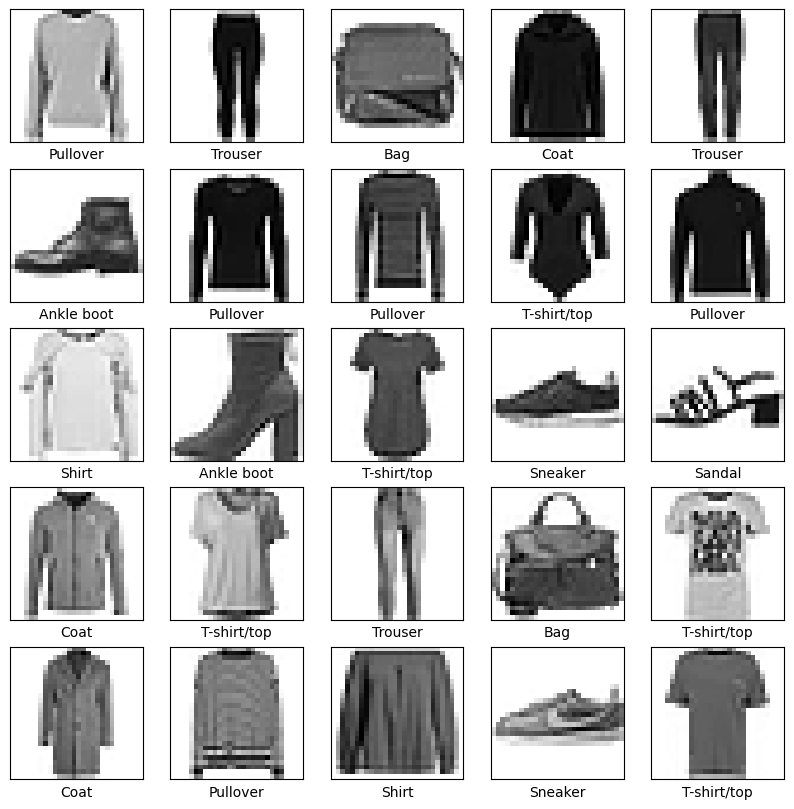

In [109]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

## El modelo

In [110]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

C:\Users\ftorr\anaconda3\envs\NuevoAmbiente\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compilar el modelo

In [111]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Entrena el modelo

In [112]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [113]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7838 - loss: 0.6234
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8615 - loss: 0.3831
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8788 - loss: 0.3373
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8847 - loss: 0.3187
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8910 - loss: 0.2951


## Evaluar la precisión del modelo

In [114]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8801 - loss: 0.3377
Accuracy on test dataset: 0.8737000226974487


## Predicciones con el modelo

In [115]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [116]:
predictions.shape

(32, 10)

In [117]:
predictions[0]

array([1.3086008e-05, 4.0888199e-06, 2.2542011e-02, 2.0087391e-05,
       9.3014544e-01, 5.9991949e-09, 4.7262892e-02, 3.2677336e-09,
       1.2365373e-05, 1.0851543e-08], dtype=float32)

In [118]:
np.argmax(predictions[0])

4

In [119]:
test_labels[0]

4

In [120]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

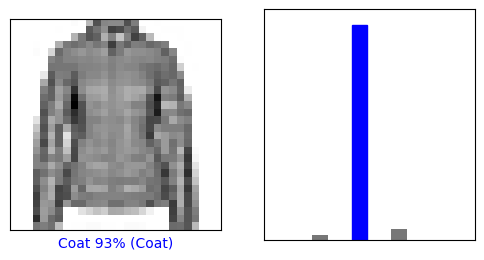

In [121]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

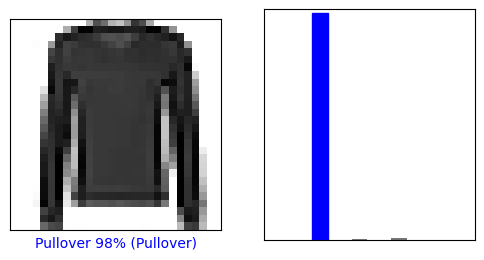

In [122]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

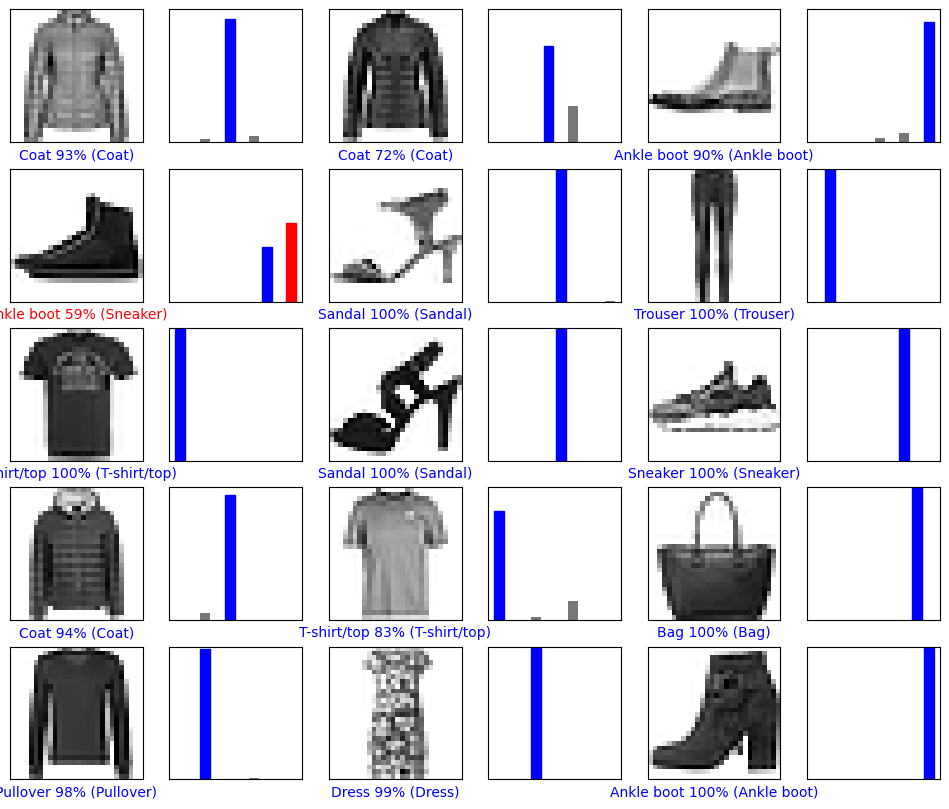

In [123]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [124]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [125]:
img

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.01176471],
        [0.        ],
        [0.2784314 ],
        [0.6745098 ],
        [0.4745098 ],
        [0.45882353],
        [0.45882353],
        [0.6862745 ],
        [0.50980395],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.6509804 ],
        [0.54901963],
        [0.4392157 ],
        [0.74509805],
        [0.7058824 ],
        [0.5686275 ],
        [0.6431373 ],
        

In [83]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [84]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[2.6226220e-05 1.6204540e-05 1.7528879e-02 7.2624539e-07 9.5004797e-01
  5.2392543e-12 3.2373767e-02 5.0637567e-11 6.1454080e-06 6.6498065e-09]]


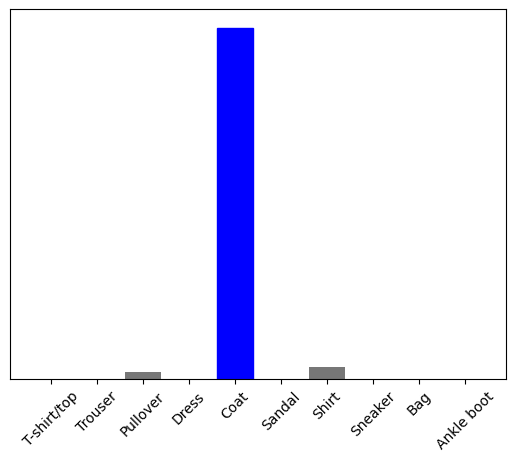

In [86]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [87]:
np.argmax(predictions_single[0])

4

## Otro ejemplo

In [126]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [128]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.17.0


## Auto MPG dataset

In [129]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [130]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


## Limpiando los datos

In [131]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [132]:
dataset = dataset.dropna()

In [133]:
dataset.shape

(392, 8)

In [134]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [135]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


## Partir los datos en Train y Test

In [136]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

## Inspecciona los datos

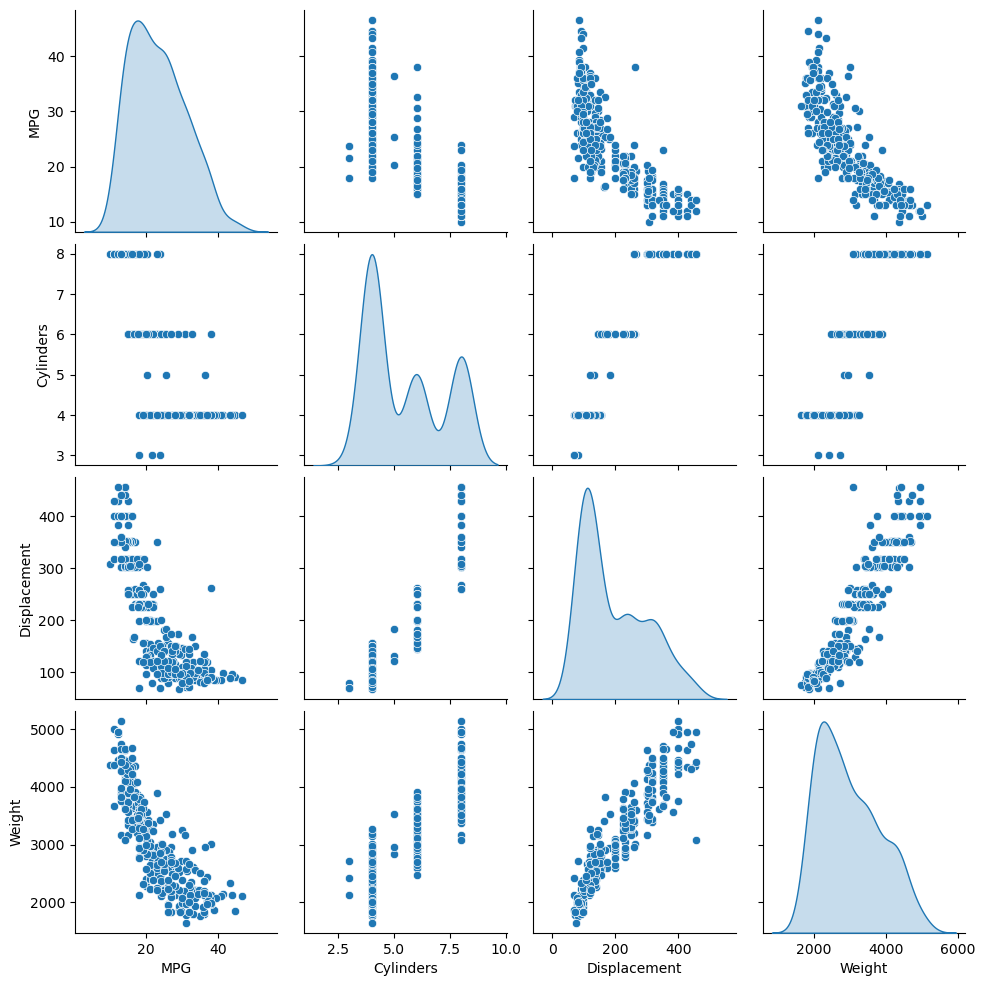

In [137]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [138]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


## Separate the target value—the "label"—from the features. 

In [139]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [140]:
test_labels

9      15.0
25     10.0
28      9.0
31     25.0
33     19.0
       ... 
369    34.0
375    36.0
382    34.0
384    32.0
396    28.0
Name: MPG, Length: 78, dtype: float64

## Normalización

In [141]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642


### The tf.keras.layers.Normalization is a clean and simple way to add feature normalization into your model.

### The first step is to create the layer:

In [143]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [144]:
first = np.array(train_features[:1])
first

array([[4, 90.0, 75.0, 2125.0, 14.5, 74, False, False, True]],
      dtype=object)

In [149]:
train_features[:3]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,False,False,True
282,4,140.0,88.0,2890.0,17.3,79,False,False,True
69,8,350.0,160.0,4456.0,13.5,72,False,False,True


In [153]:
first = np.array(train_features[:5]).astype('float32')

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]
 [   4.   140.    88.  2890.    17.3   79.     0.     0.     1. ]
 [   8.   350.   160.  4456.    13.5   72.     0.     0.     1. ]
 [   4.   105.    63.  2125.    14.7   82.     0.     0.     1. ]
 [   4.    97.    67.  2145.    18.    80.     0.     1.     0. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]
 [-0.87 -0.53 -0.44 -0.12  0.63  0.85 -0.47 -0.5   0.78]
 [ 1.49  1.48  1.45  1.74 -0.74 -1.06 -0.47 -0.5   0.78]
 [-0.87 -0.87 -1.1  -1.03 -0.31  1.66 -0.47 -0.5   0.78]
 [-0.87 -0.94 -1.   -1.    0.88  1.12 -0.47  2.02 -1.29]]


## Linear regression with one variable

### Begin with a single-variable linear regression to predict 'MPG' from 'Horsepower'.

In [154]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

C:\Users\ftorr\anaconda3\envs\NuevoAmbiente\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [155]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

### This model will predict 'MPG' from 'Horsepower'.

In [156]:
horsepower_model.predict(horsepower[:10]) # No entrenado que corre con las primeras 10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[ 0.054],
       [ 0.03 ],
       [-0.099],
       [ 0.075],
       [ 0.068],
       [ 0.027],
       [ 0.081],
       [ 0.068],
       [ 0.018],
       [ 0.03 ]], dtype=float32)

In [157]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [158]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 1.11 s
Wall time: 4.5 s


In [159]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.803519,4.186919,95
96,3.804762,4.198615,96
97,3.803082,4.186166,97
98,3.803705,4.188622,98
99,3.805622,4.171122,99


In [160]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

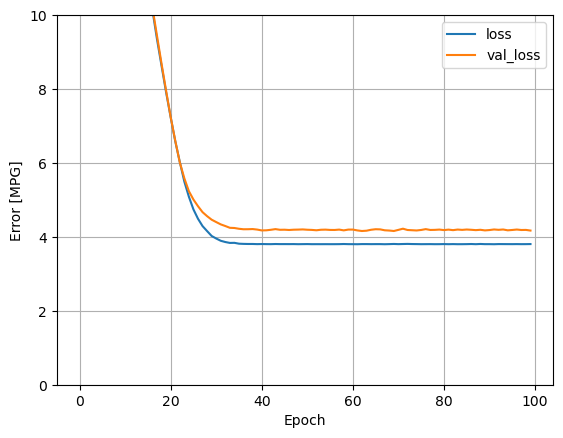

In [161]:
plot_loss(history)

In [162]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [163]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [164]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

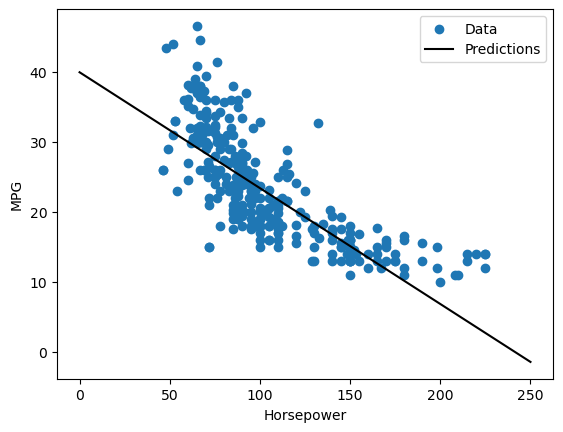

In [165]:
plot_horsepower(x, y)

## Linear regression with multiple inputs

In [166]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [167]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [168]:
linear_model.predict(train_features[:10]) #No entrenado

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[ 1.84 ],
       [ 0.987],
       [-1.009],
       [ 1.428],
       [ 0.322],
       [ 0.203],
       [ 0.487],
       [-1.633],
       [ 0.617],
       [ 0.6  ]], dtype=float32)

In [170]:
linear_model.layers[1].kernel # parámetros del modelo 9 variables y 1 constante

<KerasVariable shape=(9, 1), dtype=float32, path=sequential_7/dense_13/kernel>

In [171]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [172]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 1.09 s
Wall time: 4.39 s


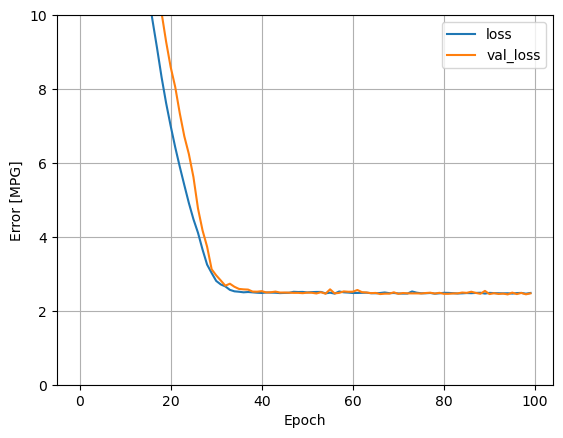

In [173]:
plot_loss(history)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


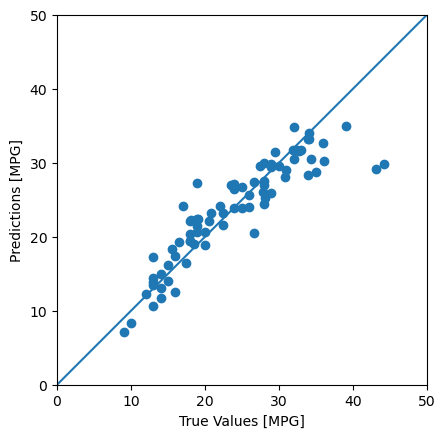

In [201]:
test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [174]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [175]:
test_results

{'horsepower_model': 3.6493663787841797, 'linear_model': 2.4938814640045166}

In [177]:
print("These are the linear model variables: {}".format(linear_model.get_weights()))

These are the linear model variables: [array([   5.478,  195.318,  104.869, 2990.252,   15.559,   75.898,
          0.178,    0.197,    0.624], dtype=float32), array([     2.88 ,  10850.414,   1446.699, 709896.8  ,      7.755,
           13.467,      0.147,      0.158,      0.235], dtype=float32), 0, array([[-0.407],
       [-0.003],
       [-1.291],
       [-3.329],
       [-0.927],
       [ 2.217],
       [-0.072],
       [ 0.692],
       [-0.783]], dtype=float32), array([23.084], dtype=float32)]


## Regresión Lineal a através de Red Neuronal profunda

Estos modelos contendrán algunas capas más que el modelo lineal:

* La capa de normalización, de la misma forma que sucedió anteriormente (con horsepower_normalizer para un modelo de una sola entrada y normalizer para un modelo con múltiples entradas).
* Dos capas Dense ocultas, no lineales con la función de activación no lineal ReLU (relu).
* Una capa Dense lineal de una sola salida.

Ambos modelos usarán el mismo procedimiento de entrenamiento, por lo que el método compile se incluye en la función build_and_compile_model a continuación.



In [192]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

## Regresión usando una DNN y una sola entrada

In [179]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [180]:
dnn_horsepower_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [181]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: total: 4.22 s
Wall time: 12.2 s


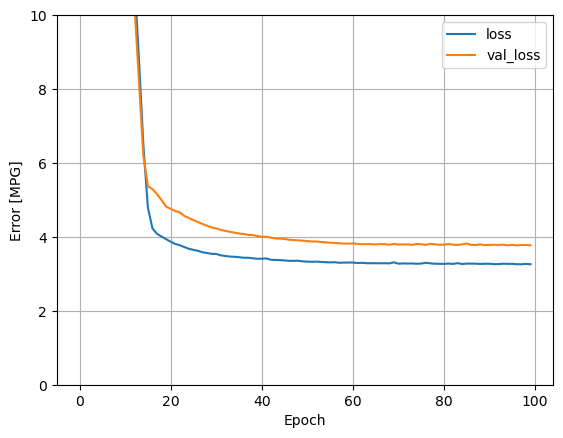

In [182]:
plot_loss(history)

In [183]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


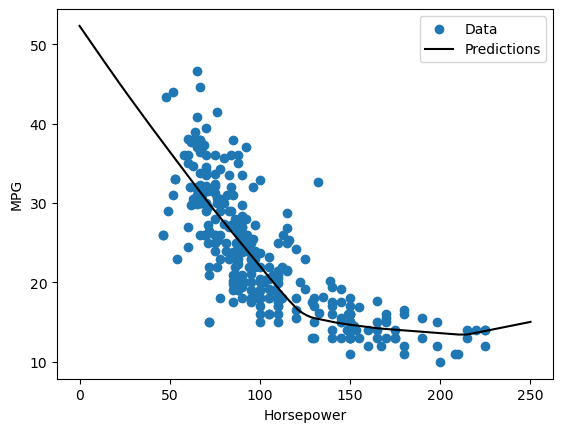

In [185]:
plot_horsepower(x, y)

In [186]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

In [187]:
test_results

{'horsepower_model': 3.6493663787841797,
 'linear_model': 2.4938814640045166,
 'dnn_horsepower_model': 2.906263828277588}

## Regresión usando una DNN y múltiples entradas

In [193]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [194]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization)      │ (314, 9)                    │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [195]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: total: 5.02 s
Wall time: 11.8 s


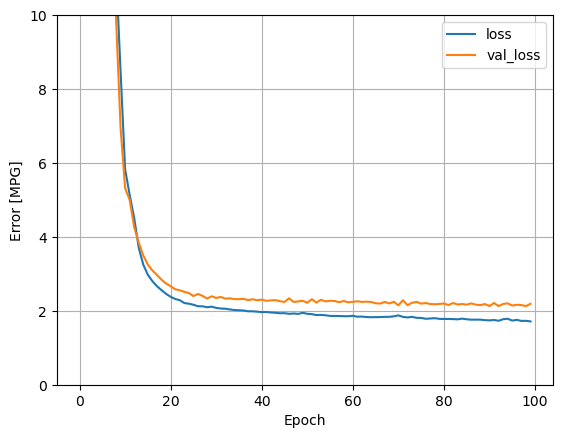

In [196]:
plot_loss(history)

In [197]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [198]:
test_results

{'horsepower_model': 3.6493663787841797,
 'linear_model': 2.4938814640045166,
 'dnn_horsepower_model': 2.906263828277588,
 'dnn_model': 1.6669095754623413}

## Rendimiento del conjunto de pruebas

In [199]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.649366
linear_model,2.493881
dnn_horsepower_model,2.906264
dnn_model,1.666910


## Hacer predicciones con dnn_model

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


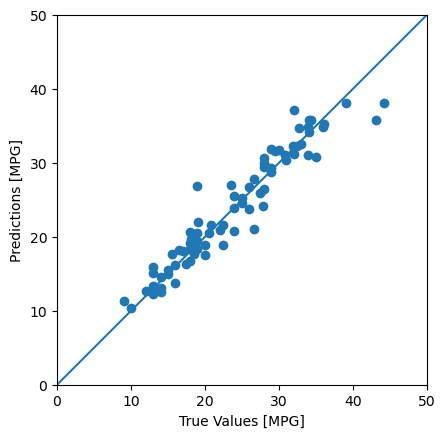

In [200]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


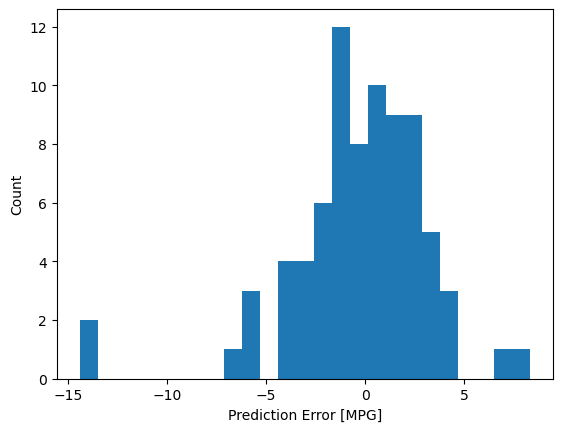

In [202]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')